In [3]:
import sys
import os

# Add the directory containing instruments.py to the Python path
custom_module_path = "/home/rebeccaz/Github/vampires_calibration"
sys.path.append(custom_module_path)

import plotting_rewrite as plotting

h5_file_path = "/home/rebeccaz/Github/vampires_calibration/mcmc/675nm_no_IMR_offset_with_dichroic_uniform_priors_and_jax_acceleration_and_logf_bounds_attempt_two.h5"
txt_file_path = "/home/rebeccaz/Github/vampires_calibration/scipy_minimize/data_files/produced/675-50nm_no_IMR_offset_or_IMR_and_HWP_constraints.txt"


Chain shape (nsteps, nwalkers, ndim): (40000, 62, 13)


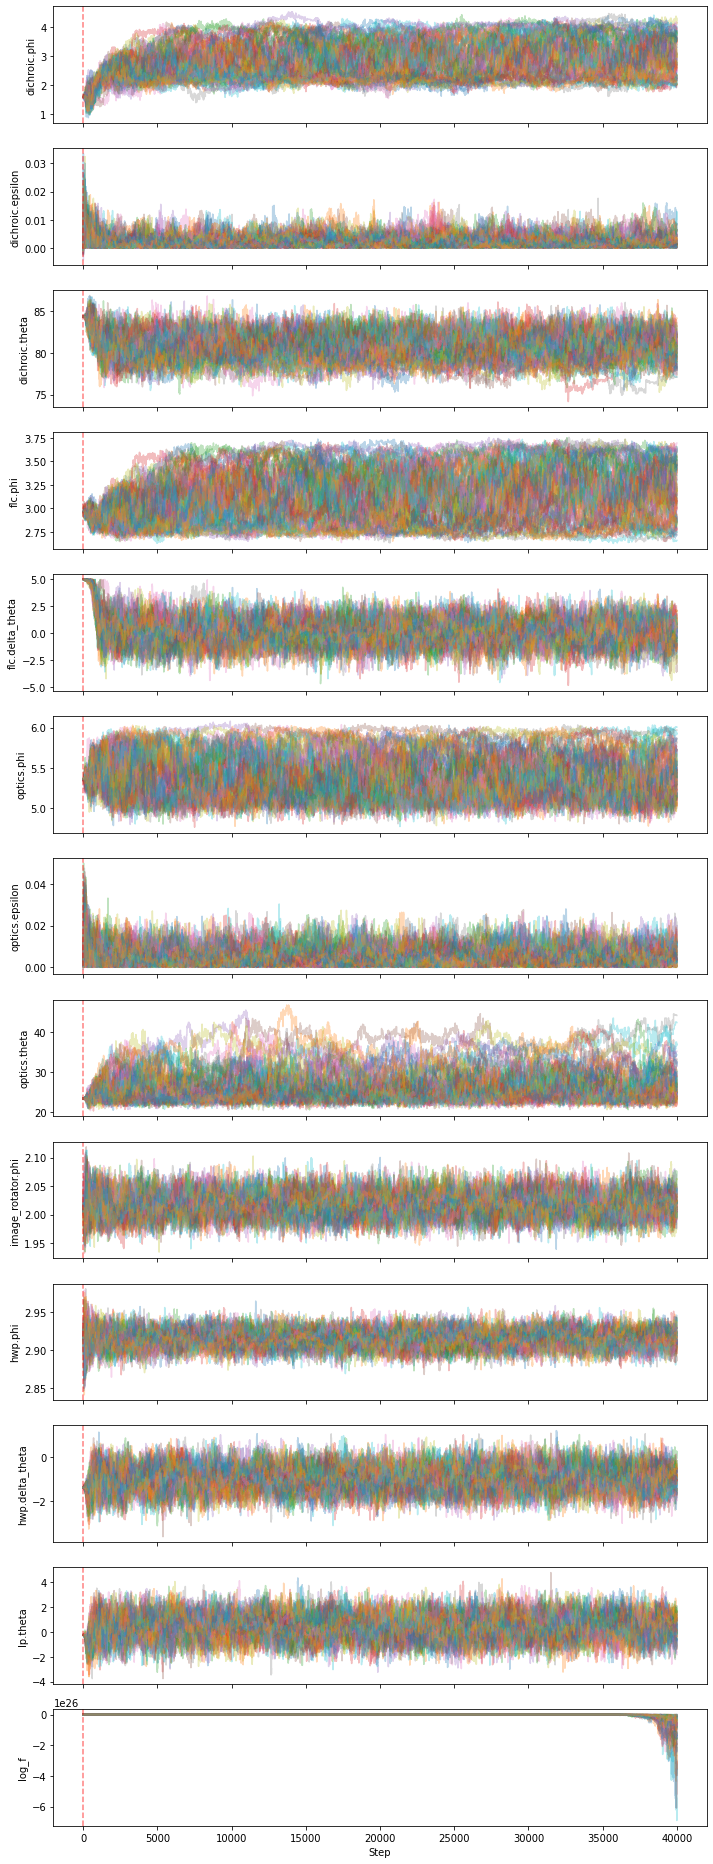

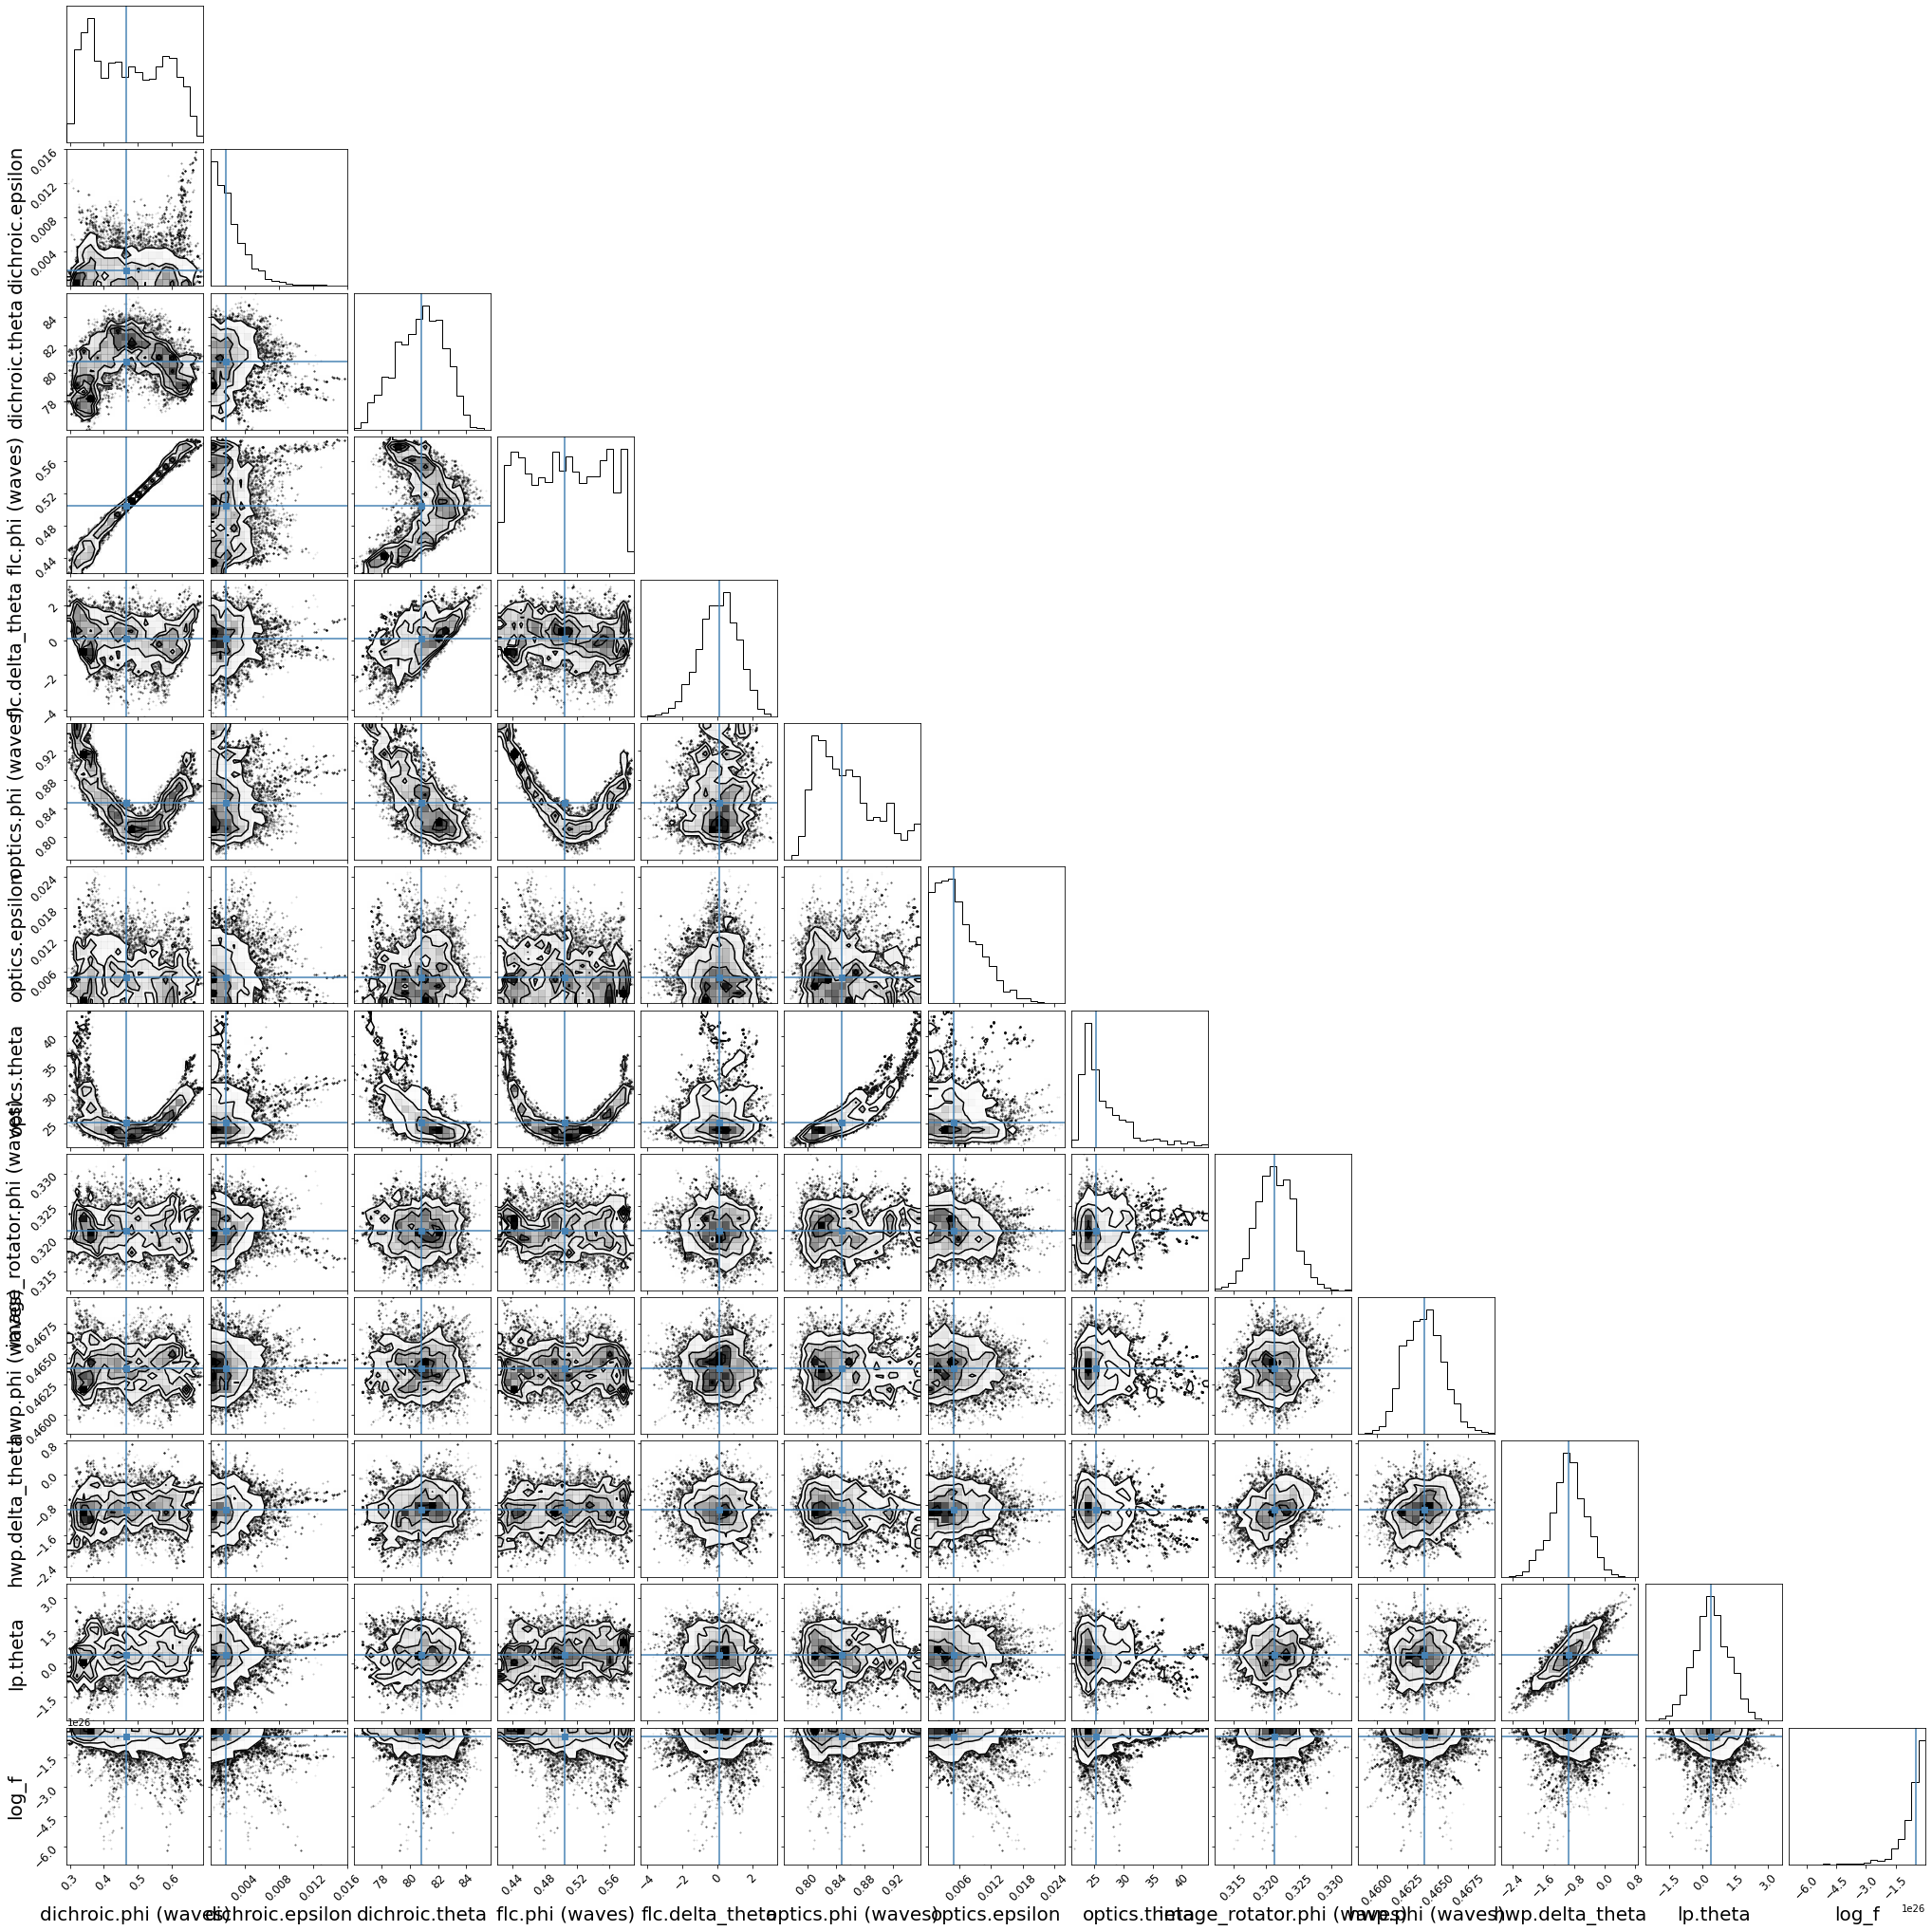

dichroic.phi (waves): 0.43278 ± 0.10429
dichroic.epsilon: 0.00172 ± 0.00201
dichroic.theta: 80.91228 ± 1.67801
flc.phi (waves): 0.49196 ± 0.04409
flc.delta_theta: 0.14604 ± 1.22749
optics.phi (waves): 0.84652 ± 0.04249
optics.epsilon: 0.00491 ± 0.00412
optics.theta: 24.94656 ± 3.87584
image_rotator.phi (waves): 0.32103 ± 0.00292
hwp.phi (waves): 0.46399 ± 0.00163
hwp.delta_theta: -0.97036 ± 0.48641
lp.theta: 0.39203 ± 0.85337
log_f: -42960263577136.09375 ± 14790629734318508171329536.00000


In [4]:
chain, names = plotting.load_chain_and_labels(h5_file_path, txt_file_path, include_logf = True)
all_step_range = (0, None)
corner_plot_step_range = (39000, 40000)

# Optional: Check chain shape after loading
print("Chain shape (nsteps, nwalkers, ndim):", chain.shape)

# Plot trace plots for MCMC chains
plotting.plot_trace(chain, names, step_range=all_step_range, max_walkers=100)

# Plot corner plot from flattened chain
plotting.plot_corner_flat(chain, names, step_range=corner_plot_step_range)

# Print median ± std for each parameter
plotting.summarize_posteriors(chain, names, step_range=all_step_range)


# Plotting median from fitting

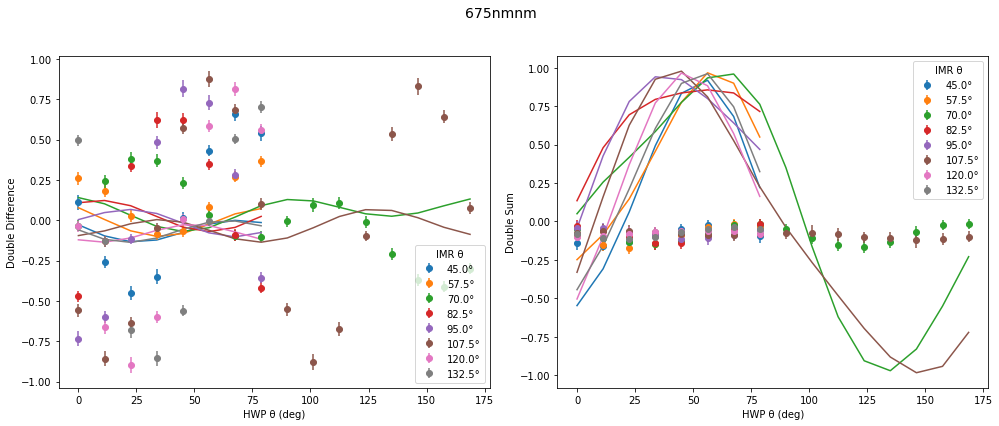

In [2]:
import numpy as np
import h5py
import json
import instruments_jax as inst
from instruments_jax import parse_configuration, generate_system_mueller_matrix, model, plot_data_and_model, process_dataset, process_errors

# --- User inputs ---
# h5_filename = "675nm_no_IMR_offset_with_dichroic.h5"
# txt_filename = "675-50nm.txt"
csv_file_path = "/home/rebeccaz/Github/vampires_calibration/data/20230914_processed_table.csv"
filter_wavelength = "675-50"
wavelength_str = "675nm"
system_dict = {  # You can load this from elsewhere if needed
    "components": {
        "wollaston": {
            "type": "wollaston_prism_function",
            "properties": {"beam": "o", "transmission_ratio": 1.18},
        },
        "dichroic": {
            "type": "diattenuator_retarder_function",
            "properties": {"phi": 0, "epsilon": 0, "theta": 0},
        },
        "flc": {
            "type": "general_retarder_function",
            "properties": {"phi": 0.5 * 2 * np.pi, "theta": 0, "delta_theta": 0},
        },
        "optics": {
            "type": "diattenuator_retarder_function",
            "properties": {"phi": 0, "epsilon": 0, "theta": 0},
        },
        "image_rotator": {
            "type": "general_retarder_function",
            "properties": {"phi": 0.5 * 2 * np.pi, "theta": 0, "delta_theta": 0},
        },
        "hwp": {
            "type": "general_retarder_function",
            "properties": {"phi": 0.5, "theta": 0, "delta_theta": 0},
        },
        "lp": {
            "type": "general_linear_polarizer_function_with_theta",
            "properties": {"theta": 0},
        },
    }
}

# --- Load data ---
with h5py.File(h5_filename, "r") as f:
    chain = f["mcmc"]["chain"][:]
if chain.shape[0] > chain.shape[1]:  # (nsteps, nwalkers, ndim)
    chain = np.transpose(chain, (1, 0, 2))  # -> (nwalkers, nsteps, ndim)
flat_chain = chain.reshape(-1, chain.shape[-1])

# --- Get median values ---
median_params = np.median(flat_chain, axis=0)

# --- Load keys and filter out log_f if needed ---
with open(txt_filename, "r") as f:
    p0_dict = json.load(f)
_, p_keys = parse_configuration(p0_dict)

# If log_f is included in p_keys, strip it
if len(median_params) > len(p_keys):
    median_params = median_params[:-1]
    p_keys = p_keys[:-1]

# --- Generate system matrix ---
system_mm = generate_system_mueller_matrix(system_dict)

# --- Load dataset ---
interleaved_values, interleaved_stds, configuration_list = inst.read_csv(
    csv_file_path, obs_mode="IPOL", obs_filter=filter_wavelength
)

# --- Generate model and plot ---
model_output = model(
    median_params,
    p_keys,
    system_mm,
    configuration_list,
    s_in=np.array([1, 0, 0, 0]),
    process_model=inst.process_model,
)

plot_data_and_model(
    interleaved_values,
    interleaved_stds,
    model_output,
    configuration_list,
    wavelength=wavelength_str,
)


# Plotting Random Chains for Fitting 

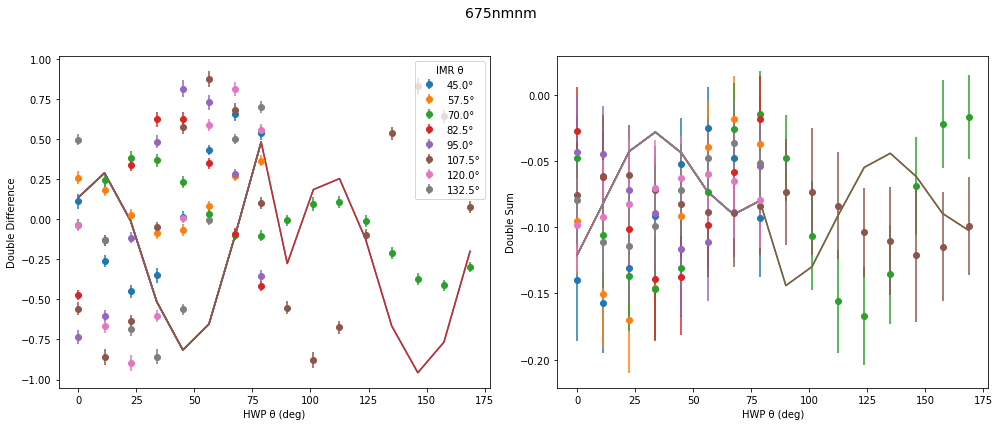

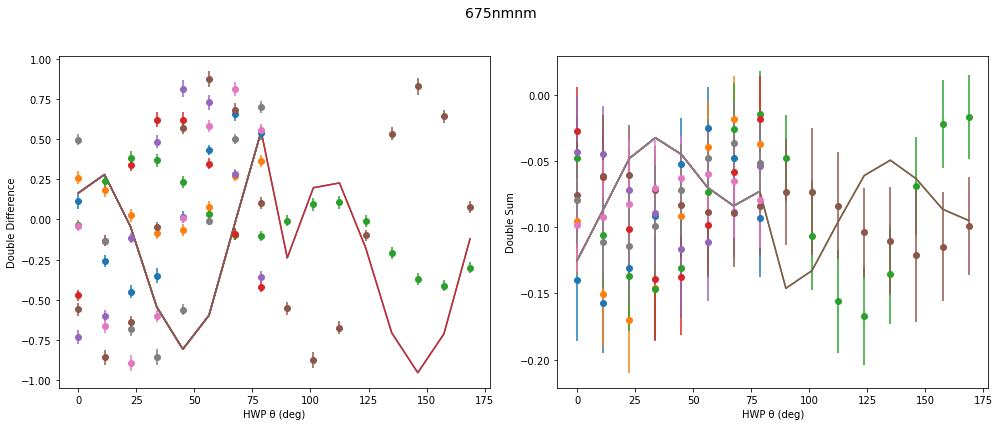

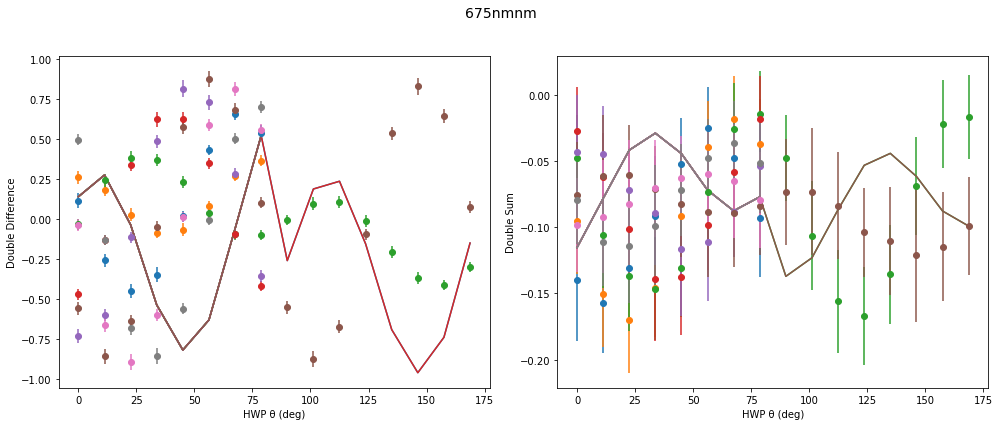

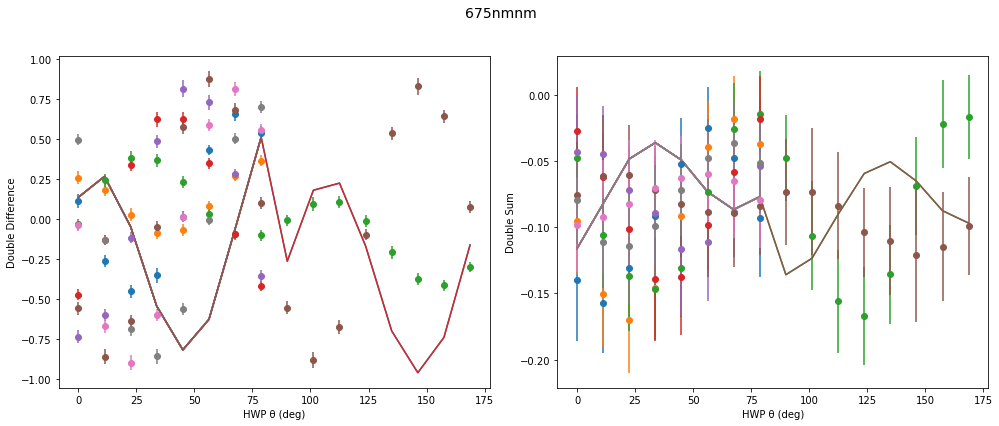

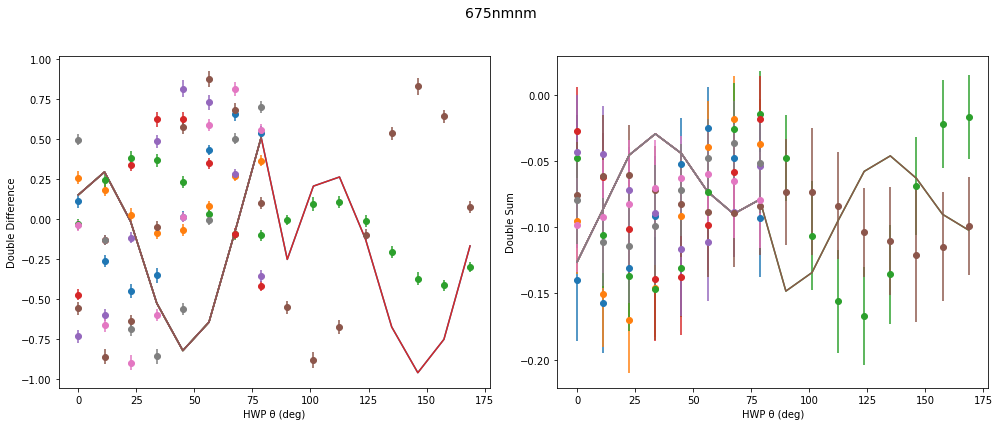

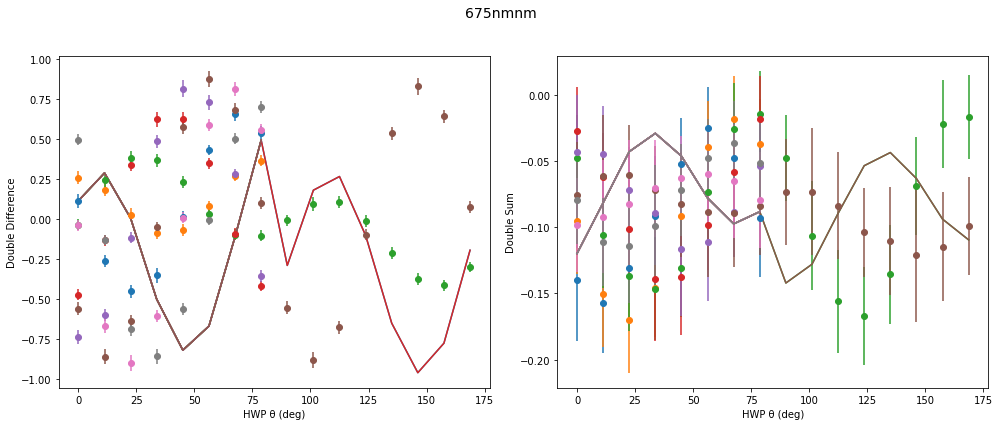

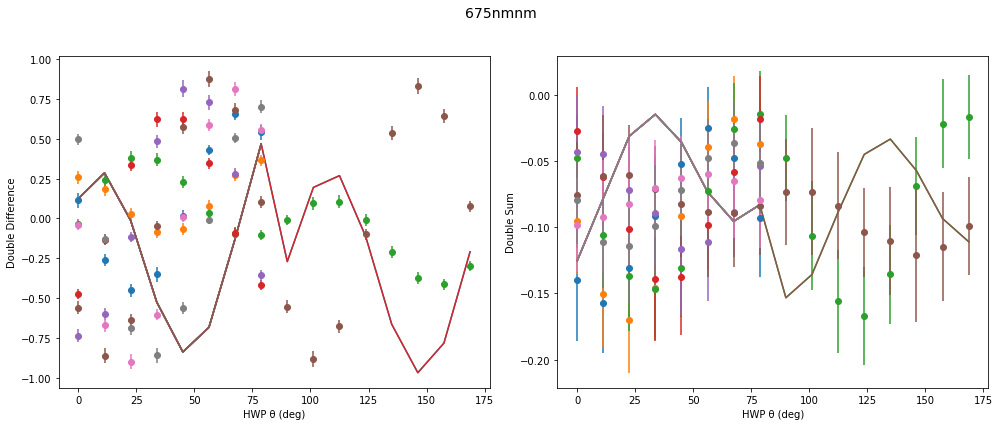

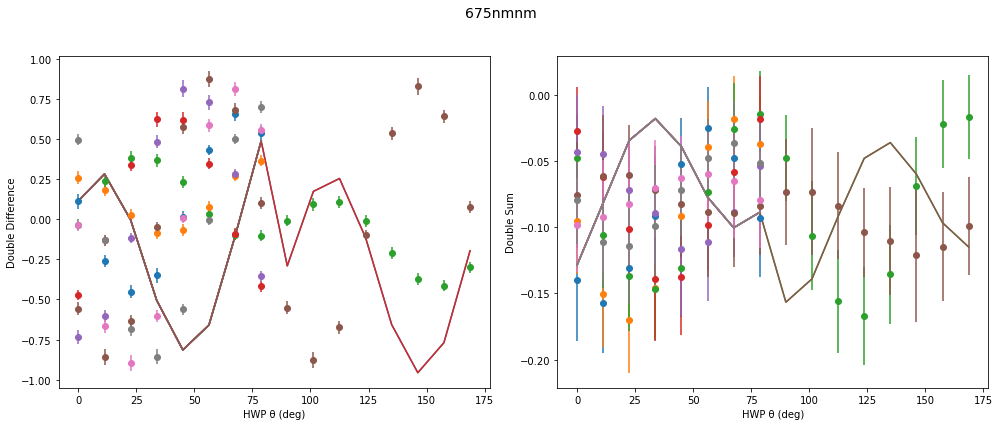

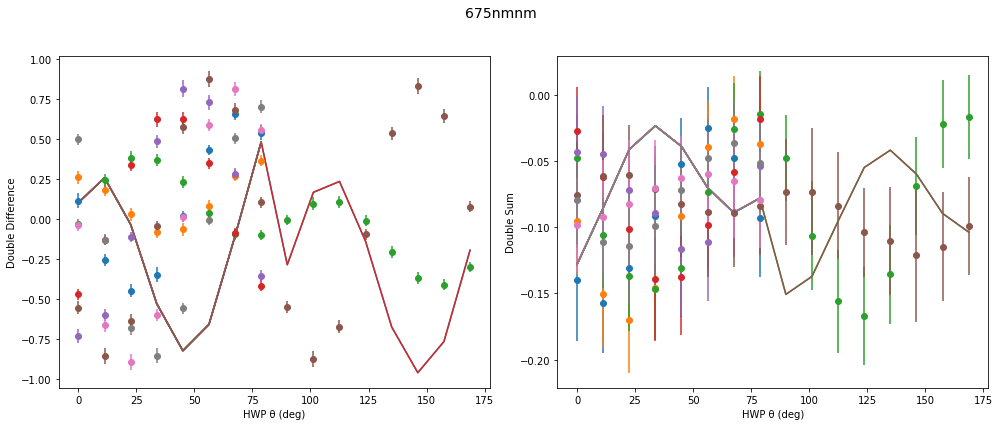

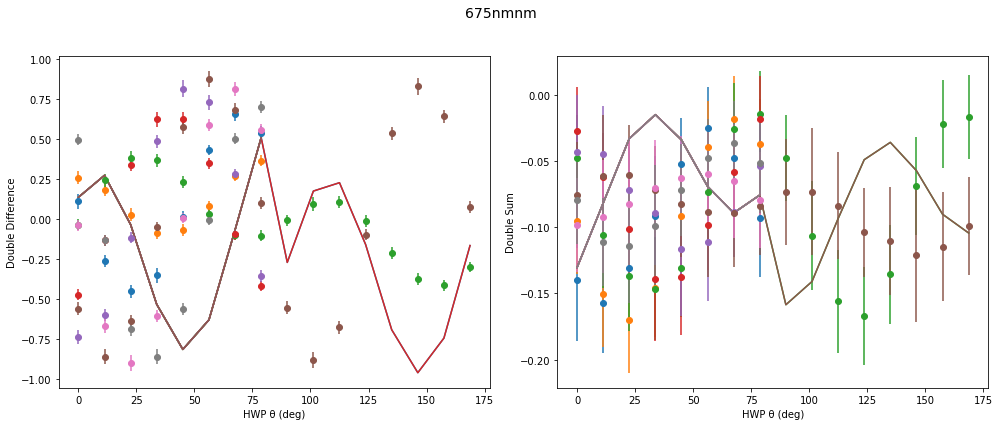

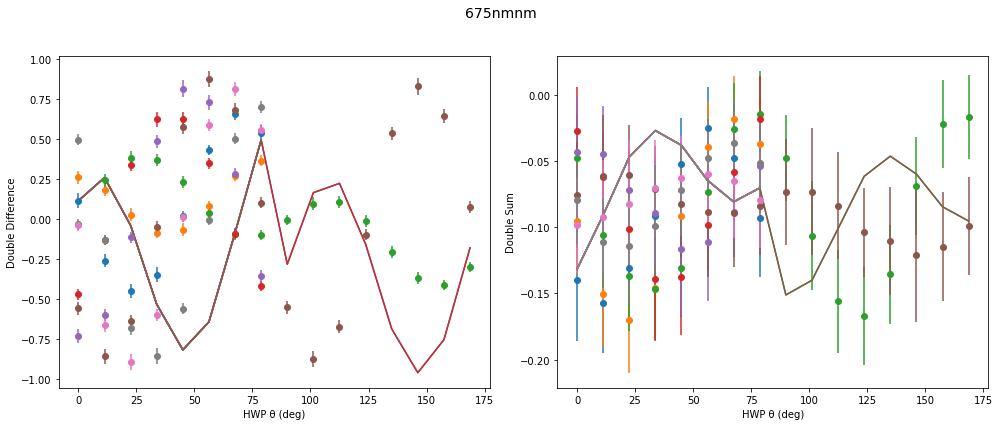

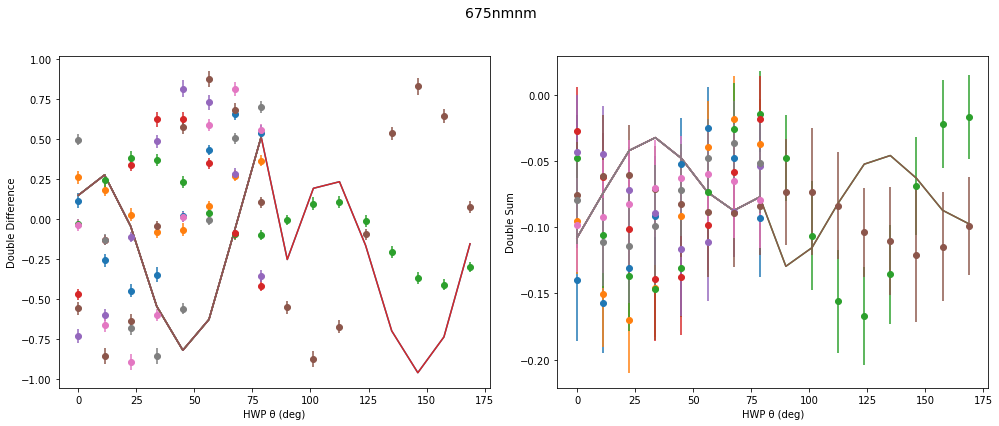

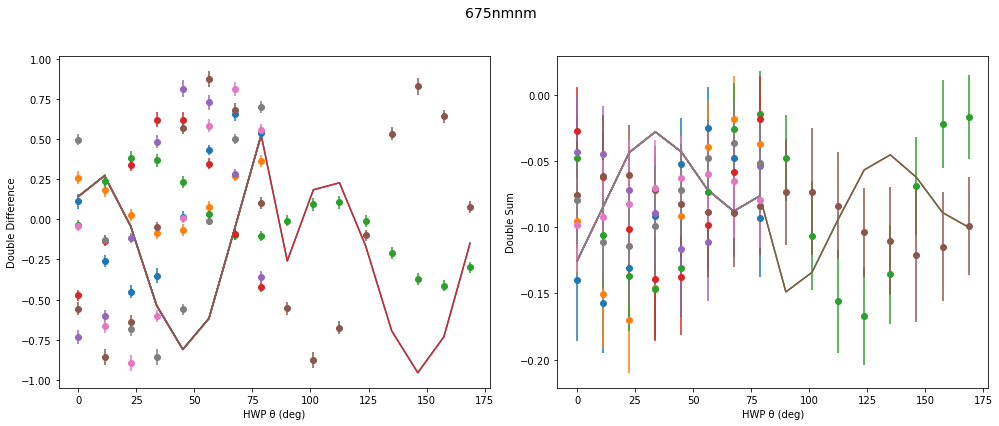

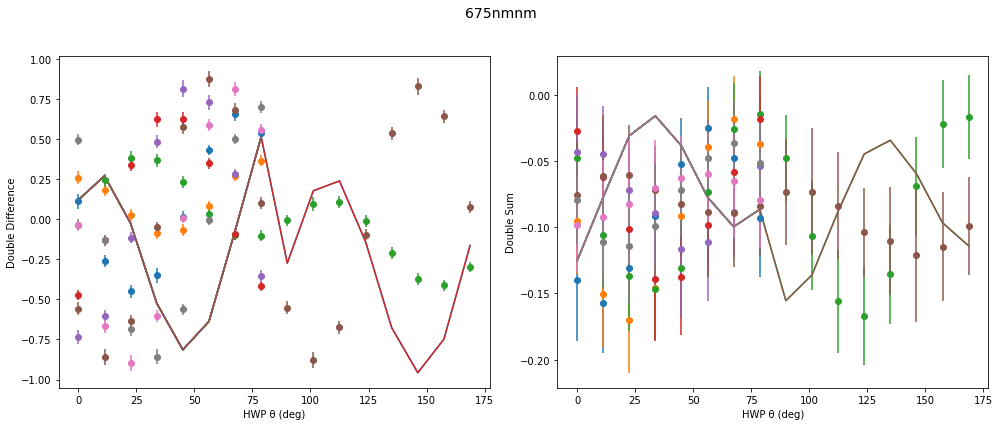

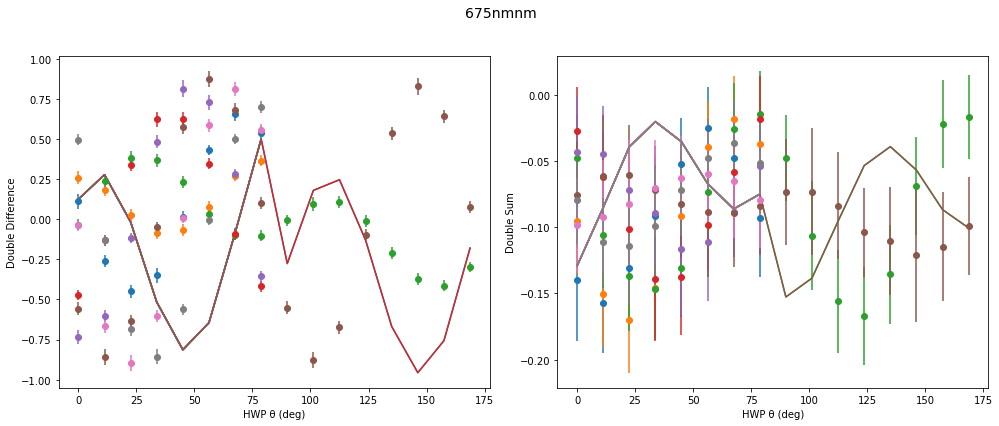

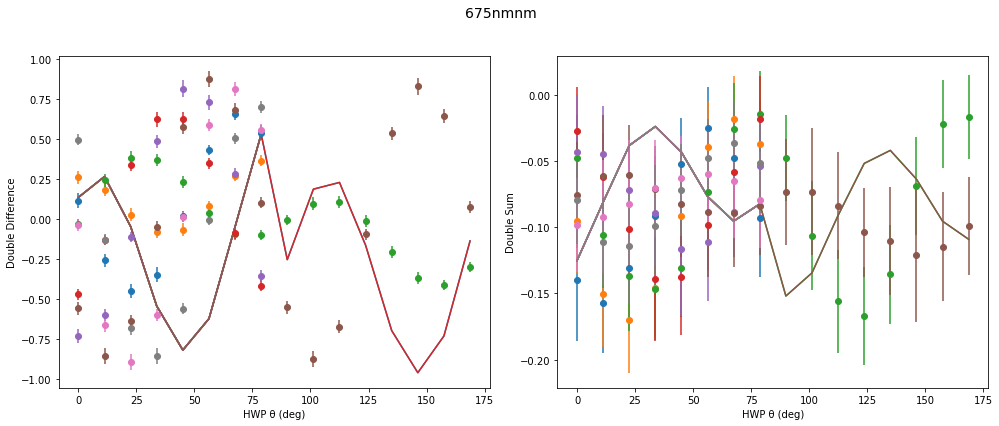

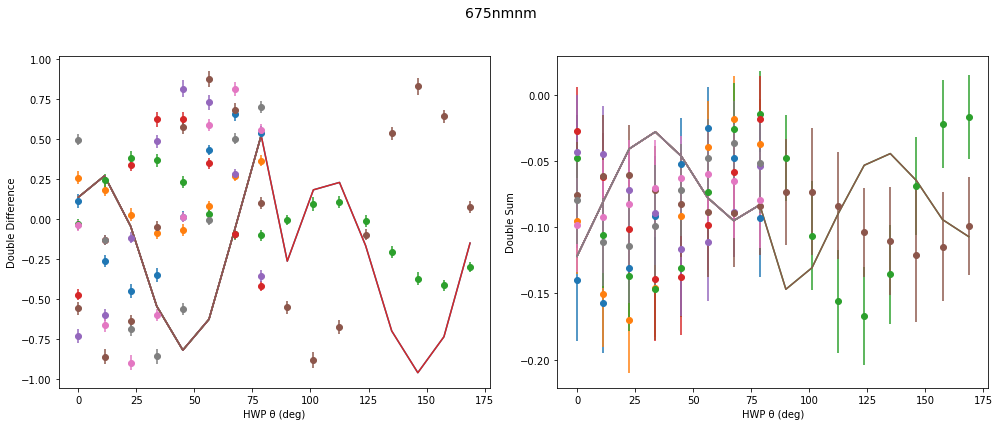

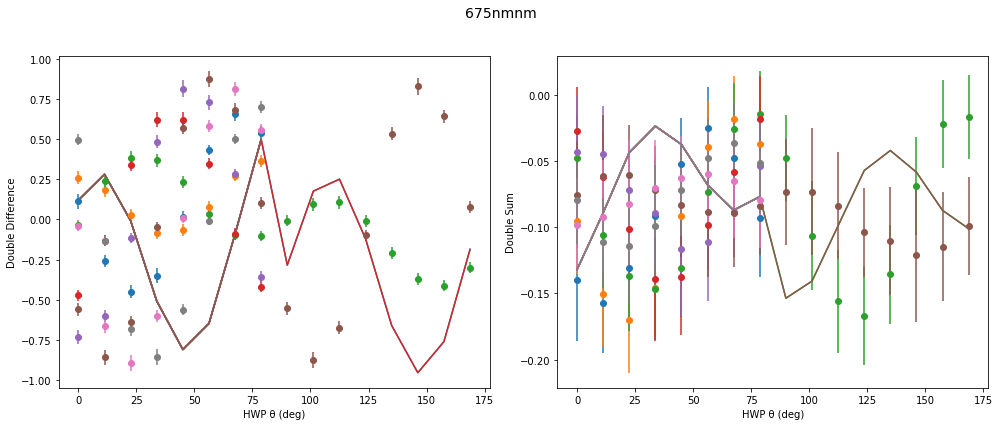

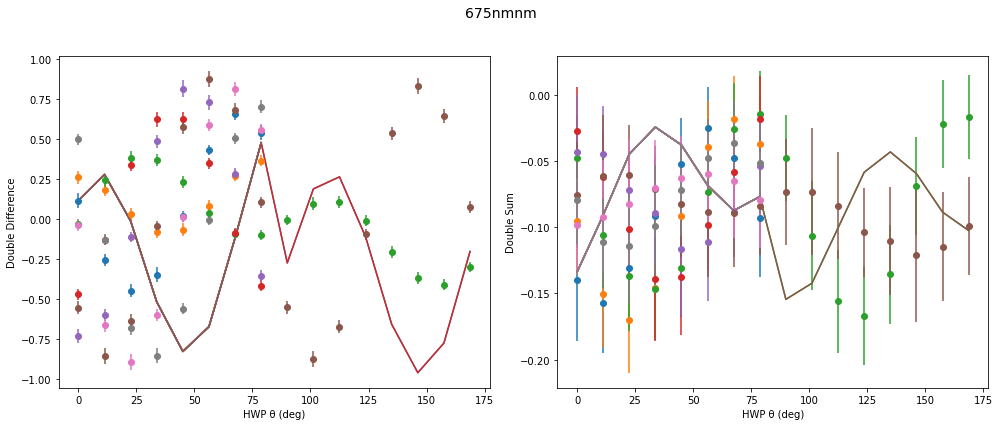

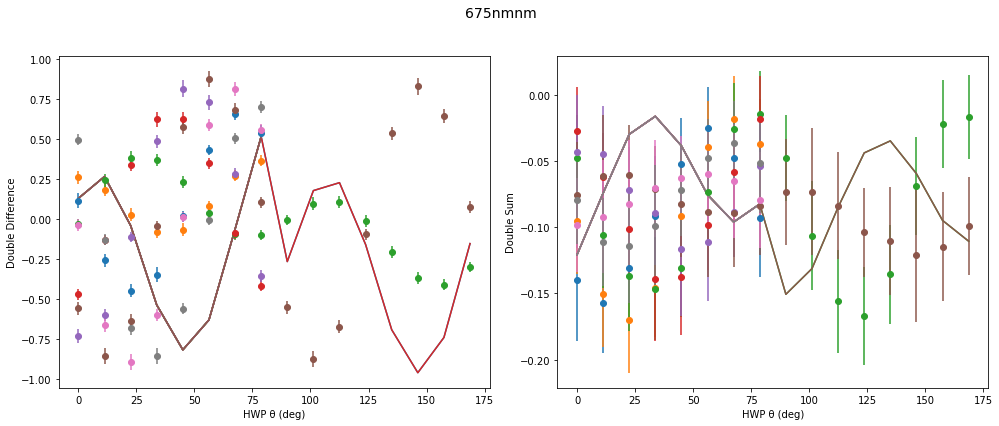

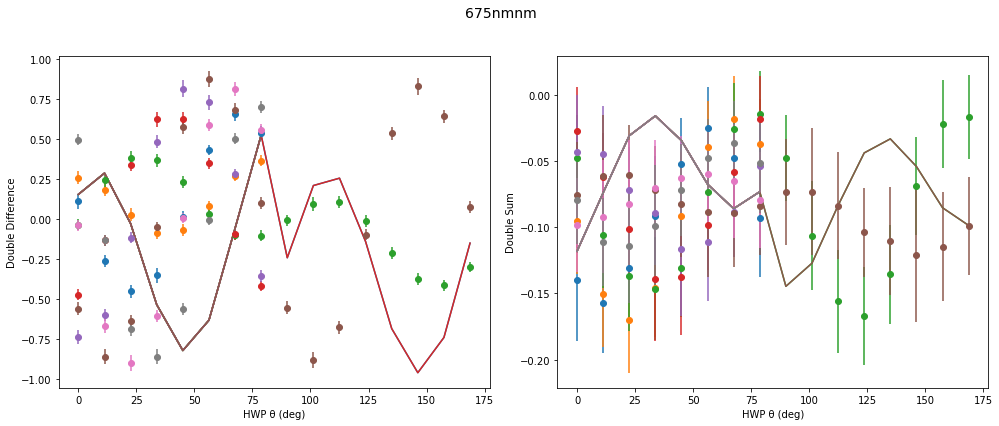

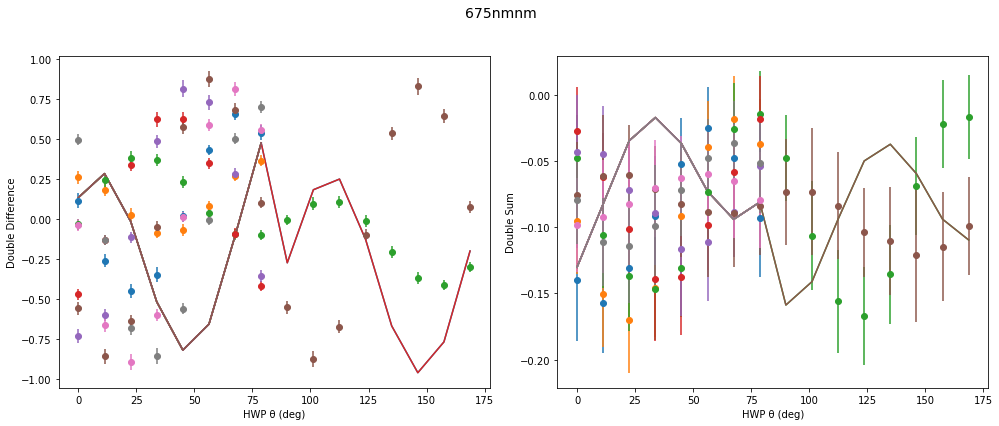

KeyboardInterrupt: 

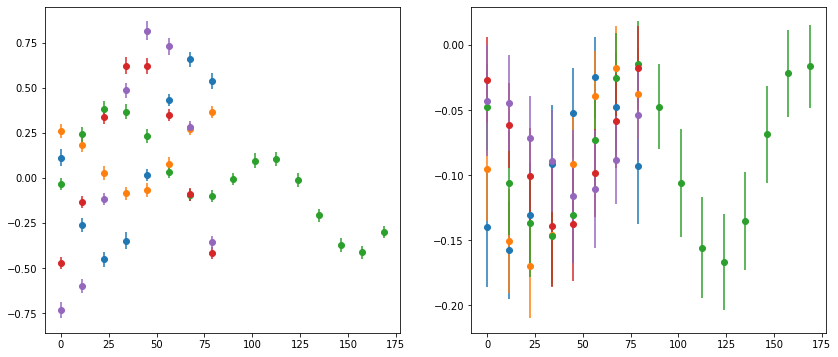

In [2]:
import sys
import os

# Add the directory containing instruments.py to the Python path
custom_module_path = "/home/rebeccaz/Github/vampires_calibration"
sys.path.append(custom_module_path)

import plotting_rewrite as plotting
import numpy as np

all_step_range = (0, None)
corner_plot_step_range = (39000, 40000)

# Define the system configuration dictionary
system_dict = {
    "components": {
        "wollaston": {
            "type": "wollaston_prism_function",
            "properties": {"beam": "o", "transmission_ratio": 1.18},
        },
        "dichroic": {
            "type": "diattenuator_retarder_function",
            "properties": {"phi": 0, "epsilon": 0, "theta": 0},
        },
        "flc": {
            "type": "general_retarder_function",
            "properties": {"phi": 0.5 * 2 * np.pi, "theta": 0, "delta_theta": 0},
        },
        "optics": {
            "type": "diattenuator_retarder_function",
            "properties": {"phi": 0, "epsilon": 0, "theta": 0},
        },
        "image_rotator": {
            "type": "general_retarder_function",
            "properties": {"phi": 0.5 * 2 * np.pi, "theta": 0, "delta_theta": 0},
        },
        "hwp": {
            "type": "general_retarder_function",
            "properties": {"phi": 0.5, "theta": 0, "delta_theta": 0},
        },
        "lp": {
            "type": "general_linear_polarizer_function_with_theta",
            "properties": {"theta": 0},
        },
    }
}

# Input paths and call plotting function
h5_file_path = "/home/rebeccaz/Github/vampires_calibration/mcmc/675nm_no_IMR_offset_with_dichroic_uniform_priors_and_jax_acceleration_and_logf_bounds_attempt_two.h5"
txt_file_path = "/home/rebeccaz/Github/vampires_calibration/scipy_minimize/data_files/produced/675-50nm_no_IMR_offset_or_IMR_and_HWP_constraints.txt"
csv_file_path = "/home/rebeccaz/Github/vampires_calibration/data/20230914_processed_table.csv"

plotting.plot_mcmc_fits_double_diff_sum(
    h5_filename=h5_file_path,
    txt_filename=txt_file_path,
    csv_path=csv_file_path,
    filter_wavelength="675-50",
    system_dict=system_dict,
    wavelength_str="675nm",
    n_samples=50,
    step_range = corner_plot_step_range
)
